In [1]:
from sympy import *

In [2]:
r, theta, phi, a, q, b = symbols("r theta phi a q b")
a = 0.999

rho = sqrt(r**2 + a**2*cos(theta))
Delta = r**2 -2*r+a**2
Sigma = sqrt((r**2+a**2)**2 -a**2*Delta*sin(theta)**2)
alpha = rho*sqrt(Delta)/Sigma
omega = 2* a*r/Sigma**2
omega_bar = Sigma*sin(theta)/rho


P = r**2 + a**2 - a*b
R = P**2 - Delta*((b-a)**2+q)
Theta = q-cos(theta)**2* (b**2/cos(theta)**2-a**2)

In [3]:
r_c = 2 
theta_c = pi/2
phi_c = 0

def sub_camera(f):
    return f.subs(r, r_c).subs(theta, theta_c).subs(phi,phi_c)

Omega = 1/(a+r_c**(3/2))

B_r = 0 
B_theta = 0
B_phi =1
beta = omega_bar/alpha*(Omega-omega)

beta = sub_camera(beta).subs(a, 0.999)
beta

0.40174718091769*sqrt(2)

In [4]:
N_x = 1.0/sqrt(2) 
N_y = 1.0/sqrt(2) 
N_z = 0.0 

_ = 1-beta*N_y

n_Fy =  (beta-N_y)/_
n_Fx =  -N_x*sqrt(1-beta**2)/_
n_Fz =  -N_z*sqrt(1-beta**2)/_

In [5]:
kappa = sqrt(1-B_theta**2)
n_Fr    = B_phi/kappa*n_Fx + B_r*n_Fy+B_r*B_theta/kappa * n_Fz
n_Ftheta= B_theta*n_Fy - kappa*n_Fz
n_Fphi  = -B_r/kappa * n_Fx + B_phi*n_Fy + B_theta*B_phi/kappa*n_Fz

In [6]:
E_f = 1/(alpha+omega*omega_bar*n_Fphi).subs(r, r_c).subs(a, 0.999).subs(theta, theta_c)
p_t = -1 
p_r = E_f*rho/sqrt(Delta)*n_Fr
p_theta = E_f*rho*n_Ftheta
p_phi = E_f*omega_bar*n_Fphi

p_r = sub_camera(p_r)
p_theta = sub_camera(p_theta)
p_phi = sub_camera(p_phi)

In [7]:
b = p_phi 
q = p_theta**2 +cos(theta_c)**2*(b**2/sin(theta_c)**2-a**2)

In [21]:
state = (
    r_c ,
    theta_c ,
    phi_c,
    p_r ,
    p_theta,
)

d_r =( Delta/rho**2*p_r).subs("b", b).subs("q", q)
d_theta = (1/rho**2*p_theta).subs("b", b).subs("q", q)
d_phi = diff(
    (R+Delta*Theta)/(2*Delta*rho**2),
    "b"
).subs("b", b).subs("q", q)
d_p_r     = diff(-Delta/(2*rho**2)*p_r**2-1/(2*rho**2)*p_theta**2+((R+Delta*Theta)/(2*Delta*rho**2)),r).subs("b", b).subs("q", q).simplify()
d_p_theta = diff(-Delta/(2*rho**2)*p_r**2-1/(2*rho**2)*p_theta**2+((R+Delta*Theta)/(2*Delta*rho**2)),theta).subs("b", b).subs("q", q).simplify()

def sub_state(f, state):
    return f.subs("r", state[0]).subs("theta", state[1]).subs("phi", state[2]).subs("p_r", state[3]).subs("p_theta", state[4])

In [24]:
data = (
    [],[],[]
)

for i in range(100):
    print(i)
    h = 0.01
    new_state = (
        (state[0] + h*sub_state(d_r, state)).evalf(),
        (state[1] + h*sub_state(d_theta, state)).evalf(),
        (state[2] + h*sub_state(d_phi, state)).evalf(),
        (state[3] + h*sub_state(d_p_r, state)).evalf(),
        (state[4] + h*sub_state(d_p_theta, state)).evalf(),
    )
    state = new_state
    _r=state[0]
    _theta=state[1]
    _phi=state[2]
    data[0].append((sqrt(_r**2+a**2)*sin(_theta)*cos(_phi)).evalf())
    data[1].append((sqrt(_r**2+a**2)*sin(_theta)*sin(_phi)).evalf())
    data[2].append((_r*cos(_theta)).evalf())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [23]:
print(state[0])


2


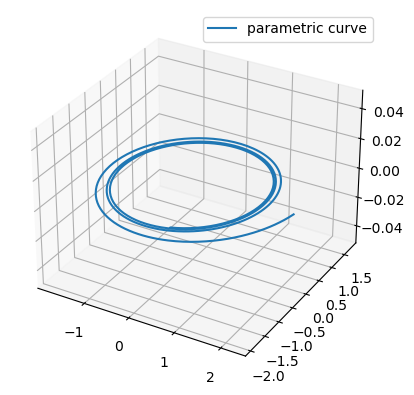

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


ax = plt.figure().add_subplot(projection='3d')

x = data[0]
y = data[1]
z = data[2]

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [ ]:
data

([2.22960898445523,
  2.22309986682956,
  2.21608450656337,
  2.20855381792474,
  2.20049872094624,
  2.19191014991961,
  2.18277906228207,
  2.17309644790267,
  2.16285333877636,
  2.15204081913361,
  2.14065003597303,
  2.12867221002399,
  2.11609864714615,
  2.10292075017225,
  2.08913003120017,
  2.07471812433981,
  2.05967679891988,
  2.04399797315903,
  2.02767372830551,
  2.01069632324836,
  1.99305820960316,
  1.97475204727400,
  1.95577072049310,
  1.93610735433831,
  1.91575533172802,
  1.89470831089227,
  1.87296024331738,
  1.85050539216087,
  1.82733835113228,
  1.80345406383388,
  1.77884784355483,
  1.75351539351036,
  1.72745282751666,
  1.70065669109047,
  1.67312398296130,
  1.64485217698213,
  1.61583924442337,
  1.58608367663286,
  1.55558450804322,
  1.52434133950575,
  1.49235436192861,
  1.45962438019481,
  1.42615283733370,
  1.39194183891740,
  1.35699417765197,
  1.32131335813030,
  1.28490362171201,
  1.24776997149317,
  1.20991819732617,
  1.17135490084795,
